In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SegDataGenerator as gen

batch_size = 1
data_path = 'data/dataset_256x256.npz'
model_path = 'model/'
steps_per_epoch=5
epochs=5
validation_step=2

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plots(imgs, figsize=(12,6), rows=1, title=None, titles=None):
    f = plt.figure(figsize=figsize)
    if title is not None: plt.title(title)
    for i in range(len(imgs)):
        sp = f.add_subplot(rows, len(imgs)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=8)
        plt.imshow(np.squeeze(imgs[i]), cmap='gray')

In [3]:
trainGenerator = gen.SegDataGenerator(validation_split=0.2, width_shift_range=0.02,
                                   height_shift_range=0.02, zoom_range=0.1,
                                   horizontal_flip=True, vertical_flip=True,
                                   samplewise_center=False, samplewise_std_normalization=False,
                                   elastic_transform=False, rotation_right=False)
train_data = trainGenerator.flow_from_directory(data_path, subset='training', batch_size=batch_size,
                                               class_mode='segmentation', color_mode='grayscale',
                                               use_contour=True, label_bw=True)


Reading from previously loaded data.
Found 535 images belonging to 2 classes.


[146]
get into get batches


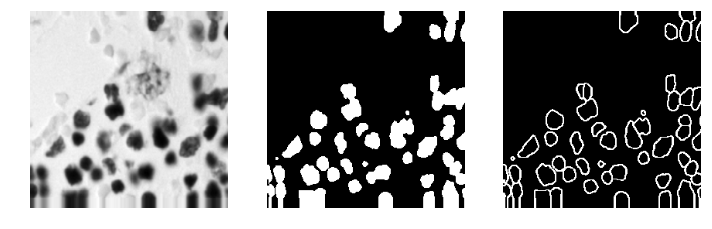

In [4]:
# use_contour
image, label = next(train_data)
seg = label['segmentation']
contour = label['contour']
plots([image, seg, contour])
# without contour
# image, seg = next(train_data)
# plots([image, seg])

In [5]:
# print(seg[0,50:60,50:60,0])